In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [2]:
USA= pd.read_csv(r"Z:\Purva226518_2sem\Machine Lear\Dataset\USA_Housing.csv")
USA

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Check Data Types

In [3]:
USA.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

# Missing Values?

In [4]:
USA.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Data Visualization

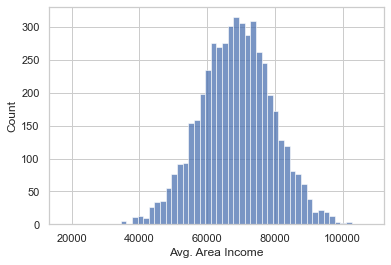

In [5]:
sns.histplot(x='Avg. Area Income',data=USA);

High frequency of area with avg.income range 50000-90000

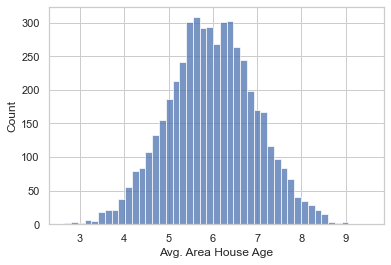

In [6]:
sns.histplot(x='Avg. Area House Age',data=USA);

Most areas have avg. house age between 5-7 years old

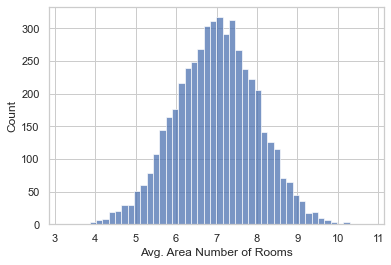

In [7]:
sns.histplot(x='Avg. Area Number of Rooms',data=USA);

Most areas have avg. no. of house rooms between 6-8 rooms

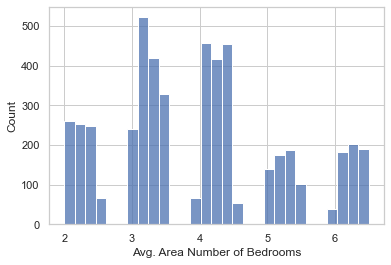

In [8]:
sns.histplot(x='Avg. Area Number of Bedrooms',data=USA);

Most areas have avg. no. of house bedrooms between 3-4 rooms

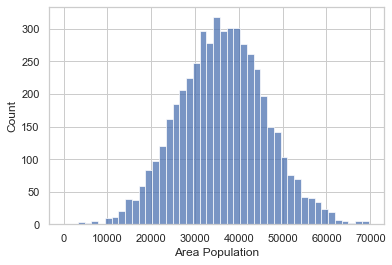

In [9]:
sns.histplot(x='Area Population',data=USA);

Most areas have population between 25k to 50k

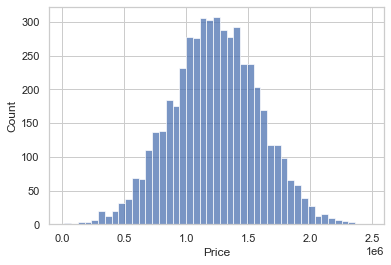

In [10]:
sns.histplot(x='Price',data=USA);

Most areas have house price between 1-1.5 Million

<AxesSubplot:>

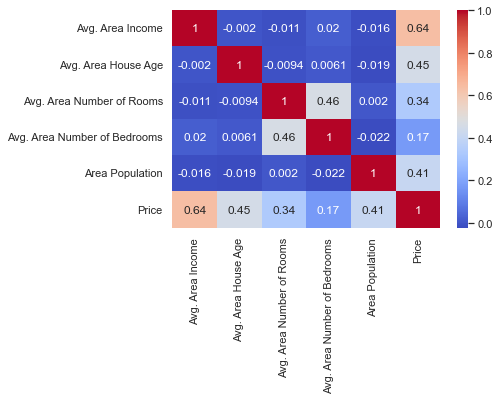

In [11]:
sns.heatmap(USA.corr(),cmap='coolwarm',annot=True)


# Create Dummy Variables

In [12]:
USA.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
y=['Price']
X=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
   'Area Population']

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
x = USA[X]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                     feature        VIF
0           Avg. Area Income  29.632060
1        Avg. Area House Age  27.446757
2  Avg. Area Number of Rooms  32.156187
3            Area Population  12.813187


In [15]:
pd.DataFrame(USA[X])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


In [16]:
x=np.array(USA[X])
x

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.65012838e+04]])

# Dependent Variable

In [17]:
y=np.array(USA[y])
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

# Training and Testing data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
x_train

array([[7.79474644e+04, 6.44178861e+00, 7.19340380e+00, 2.96607966e+04],
       [6.99314011e+04, 6.09950657e+00, 5.17862848e+00, 5.20791882e+04],
       [6.58413088e+04, 5.58706465e+00, 6.49028185e+00, 4.82532766e+04],
       ...,
       [6.70941971e+04, 5.34643683e+00, 7.37460657e+00, 3.00225372e+04],
       [5.25413198e+04, 4.88524325e+00, 7.22552182e+00, 4.12582623e+04],
       [8.67628829e+04, 6.53019329e+00, 5.10696225e+00, 4.77245814e+04]])

# Decision Tree

In [20]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

# Predict the results

In [21]:
y_pred=model.predict(x_test)
y_pred

array([ 990004.73059399, 1175781.41757006,  879511.19644748, ...,
       1433493.80221998,  734562.10453365,  469262.81557521])

In [22]:
y_test

array([[ 894251.06863578],
       [ 932979.36062132],
       [ 920747.91128789],
       ...,
       [1372994.2901085 ],
       [ 770770.58487572],
       [ 529282.08439209]])